In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv('data/diabetes.csv')

# Exploratory Data Analysis

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [4]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,...,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,...,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480,0.641026
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,...,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337,0.480384
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,...,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350,0.000000
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,...,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000,1.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,...,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660,1.000000
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(351, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      351 non-null    int64  
 1   V2      351 non-null    int64  
 2   V3      351 non-null    float64
 3   V4      351 non-null    float64
 4   V5      351 non-null    float64
 5   V6      351 non-null    float64
 6   V7      351 non-null    float64
 7   V8      351 non-null    float64
 8   V9      351 non-null    float64
 9   V10     351 non-null    float64
 10  V11     351 non-null    float64
 11  V12     351 non-null    float64
 12  V13     351 non-null    float64
 13  V14     351 non-null    float64
 14  V15     351 non-null    float64
 15  V16     351 non-null    float64
 16  V17     351 non-null    float64
 17  V18     351 non-null    float64
 18  V19     351 non-null    float64
 19  V20     351 non-null    float64
 20  V21     351 non-null    float64
 21  V22     351 non-null    float64
 22  V2

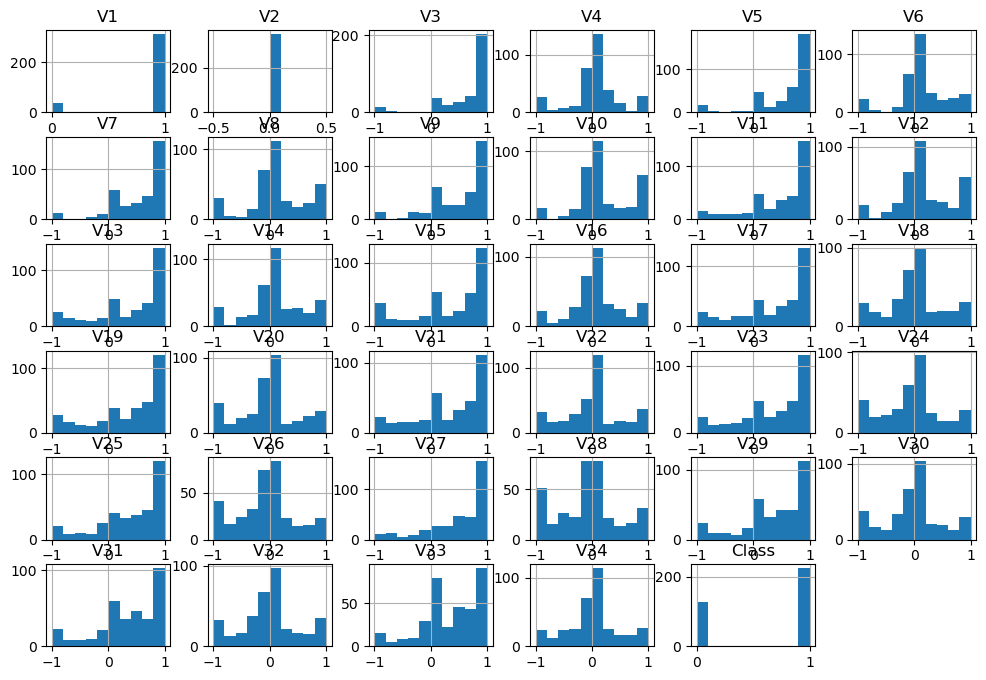

In [7]:
df.hist(figsize=(12,8))
plt.show()

In [8]:
df['Class'].value_counts()

Class
1    225
0    126
Name: count, dtype: int64

In [9]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
V17      0
V18      0
V19      0
V20      0
V21      0
V22      0
V23      0
V24      0
V25      0
V26      0
V27      0
V28      0
V29      0
V30      0
V31      0
V32      0
V33      0
V34      0
Class    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(1)

In [11]:
df.corr()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
V1,1.000000,NaN,0.302034,-0.006529,0.156152,0.127606,0.221867,0.027079,0.189242,-0.051883,...,0.149789,-0.203100,-0.010725,0.133632,-0.121415,0.167031,-0.100914,0.162962,0.010788,0.465614
V2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
V3,0.302034,NaN,1.000000,0.143365,0.476587,0.025768,0.440254,0.008717,0.471614,0.047916,...,-0.073202,0.077911,0.123345,0.344459,0.057890,0.246653,-0.009332,0.263343,0.000584,0.519145
V4,-0.006529,NaN,0.143365,1.000000,0.001152,-0.190308,-0.054030,0.255003,-0.302317,0.207697,...,-0.236987,-0.046910,0.000743,-0.041090,0.342301,-0.172276,-0.122788,-0.153964,0.034608,0.125884
V5,0.156152,NaN,0.476587,0.001152,1.000000,0.038323,0.597075,-0.029794,0.450454,-0.034236,...,-0.032254,0.140899,0.184517,0.257646,0.051068,0.399840,0.025681,0.383467,-0.099478,0.516477
V6,0.127606,NaN,0.025768,-0.190308,0.038323,1.000000,-0.010227,0.274747,-0.120712,0.200080,...,0.041787,-0.175433,-0.068775,-0.029392,-0.158090,-0.100240,0.316802,0.016899,0.185215,0.149099
V7,0.221867,NaN,0.440254,-0.054030,0.597075,-0.010227,1.000000,-0.150424,0.461889,-0.090268,...,0.087734,0.097566,0.109391,0.300632,-0.015158,0.415216,-0.008323,0.545881,-0.076460,0.450429
V8,0.027079,NaN,0.008717,0.255003,-0.029794,0.274747,-0.150424,1.000000,-0.336013,0.373567,...,-0.133023,-0.254130,0.072373,-0.139725,0.078585,-0.166682,0.152381,-0.200860,0.360610,0.207544
V9,0.189242,NaN,0.471614,-0.302317,0.450454,-0.120712,0.461889,-0.336013,1.000000,-0.251950,...,0.107478,0.172210,0.146817,0.329813,-0.031983,0.316021,-0.067499,0.344814,-0.095597,0.294852
V10,-0.051883,NaN,0.047916,0.207697,-0.034236,0.200080,-0.090268,0.373567,-0.251950,1.000000,...,-0.043680,-0.250947,0.072018,-0.123296,-0.008578,-0.155661,-0.015640,-0.203629,0.098104,0.120634


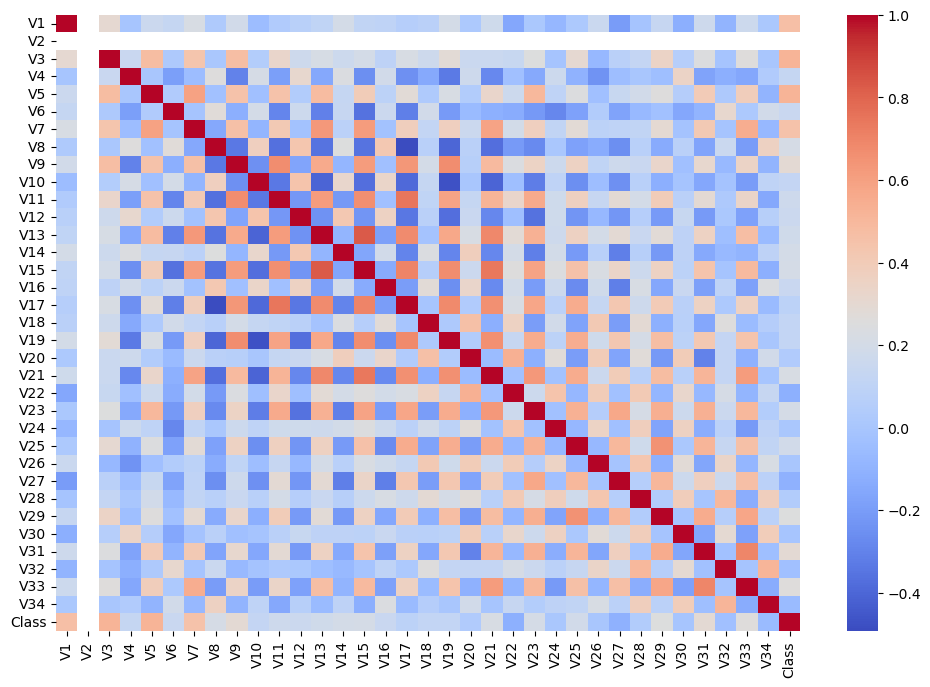

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.show()

In [13]:
#red = positive correlation, blue = negative correlation, white = no relation
#lots of light colors = weak correlations, blue/red strips = moderate relationships, diagonal red = always 1 (ignore)
#features are not strongly dependent on each other, ok to proceed

In [14]:
df.corr()['Class'].sort_values(ascending=False)

Class    1.000000
V3       0.519145
V5       0.516477
V1       0.465614
V7       0.450429
V9       0.294852
V31      0.294417
V33      0.261157
V29      0.250036
V21      0.219583
V8       0.207544
V15      0.207201
V23      0.204361
V14      0.197041
V25      0.188185
V13      0.181682
V11      0.167908
V12      0.159940
V6       0.149099
V16      0.148775
V4       0.125884
V10      0.120634
V18      0.119346
V19      0.117435
V17      0.087060
V28      0.042756
V20      0.035620
V24      0.006193
V26      0.001541
V30     -0.003942
V32     -0.036004
V34     -0.064168
V27     -0.111107
V22     -0.116385
V2            NaN
Name: Class, dtype: float64

In [15]:
#positive value = feature increases diabetes probability, negative value = as feature increases, diabetes decreases
#small values = weak predictors
#values near 0 = no relationship
#NaN = column is constant or has issues

In [16]:
df['V2'].describe()

count    351.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: V2, dtype: float64

In [17]:
df['V2'].unique()[:10]

array([0])

In [18]:
df['V2'].nunique()

1

In [19]:
df.shape

(351, 35)

In [20]:
df = df.drop(columns=['V2'])

In [21]:
df.shape

(351, 34)

In [22]:
X = df.drop(columns=['Class'])

In [23]:
y = df['Class']

In [24]:
X.shape

(351, 33)

In [25]:
y.shape

(351,)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
#without scaler = A feature with big numbers looks “more important” than a feature with small numbers.

In [28]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = scaler.transform(X_test)

# Building Models

In [29]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [30]:
y_pred = model.predict(X_test_scaled)

In [31]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [32]:
#small k = overfitting, large k = underfitting, 5 is safe default

In [33]:
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [34]:
y_pred_knn = knn.predict(X_test_scaled)

In [35]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
y_pred_dt = dt.predict(X_test_scaled)

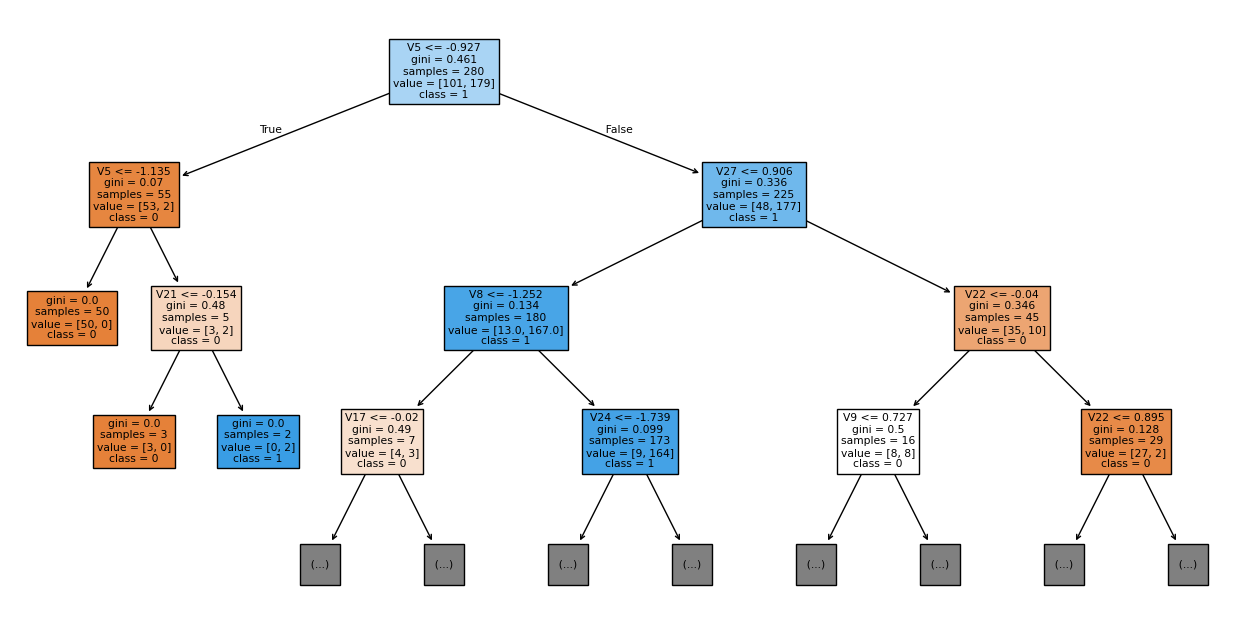

In [37]:
plt.figure(figsize=(16,8))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=['0','1'],
    filled=True,
    max_depth=3
)
plt.show()

In [38]:
rf=RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

In [39]:
rf.fit(X_train_scaled, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_pred_rf = rf.predict(X_test_scaled)

In [41]:
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(10))

V5     0.131672
V7     0.103182
V27    0.088209
V3     0.086971
V8     0.044121
V6     0.042663
V4     0.042435
V28    0.038086
V14    0.031052
V24    0.026248
dtype: float64


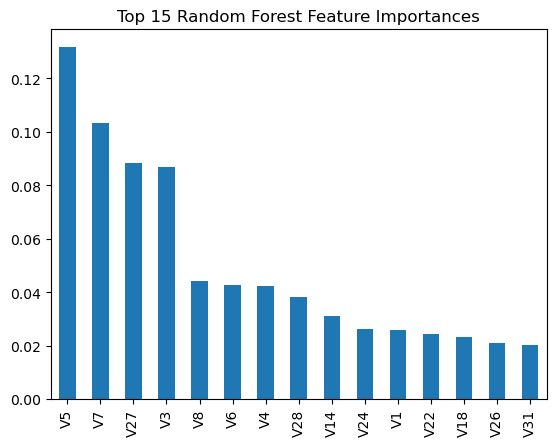

In [42]:
importances.head(15).plot(kind='bar', title="Top 15 Random Forest Feature Importances")
plt.show()

In [43]:
svm_linear = SVC(kernel = "linear", C=1.0, random_state = 42)
svm_linear.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [44]:
y_pred_svm_linear = svm_linear.predict(X_test_scaled)

In [45]:
svm_rbf = SVC(kernel = "rbf", C=1.0, gamma="scale", random_state=42)
svm_rbf.fit(X_train_scaled, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [46]:
y_pred_svm_rbf= svm_rbf.predict(X_test_scaled)

In [47]:
xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

In [48]:
xgb.fit(X_train_scaled, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [49]:
y_pred_xgb = xgb.predict(X_test)

# Comparing Models

In [50]:
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))

Logistic Regression Accuracy:  0.9295774647887324


In [51]:
cm_log = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Logistic Regression:\n",cm_log)

Confusion Matrix for Logistic Regression:
 [[21  4]
 [ 1 45]]


In [52]:
#Confusion matrix = [[TN FP] [FN TP]]

In [53]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print("Logistic Regression:")
print("TP:", TP)
print("TN:", TN)
print("FP:", FP)
print("FN:", FN)

Logistic Regression:
TP: 45
TN: 21
FP: 4
FN: 1


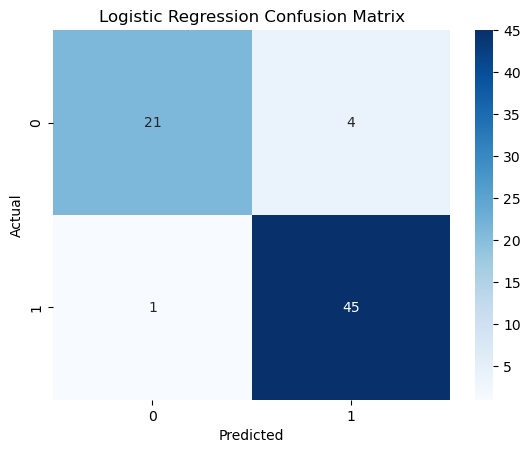

In [54]:
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The Logistic Regression model correctly identified 45 diabetic patients, missed 1 diabetics, incorrectly flagged 4 healthy patients as diabetic, and correctly identified 21 healthy patients

In [55]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred))

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.92      0.98      0.95        46

    accuracy                           0.93        71
   macro avg       0.94      0.91      0.92        71
weighted avg       0.93      0.93      0.93        71



In [56]:
print("KNN Accuracy: ", accuracy_score(y_test, y_pred_knn))

KNN Accuracy:  0.8873239436619719


In [57]:
cm_log_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix for KNN:\n", cm_log_knn)

Confusion Matrix for KNN:
 [[17  8]
 [ 0 46]]


In [58]:
TN_k, FP_k, FN_k, TP_k = confusion_matrix(y_test,y_pred_knn).ravel()

print("KNN:")
print("TP:", TP_k)
print("TN:", TN_k)
print("FP:", FP_k)
print("FN:", FN_k)

KNN:
TP: 46
TN: 17
FP: 8
FN: 0


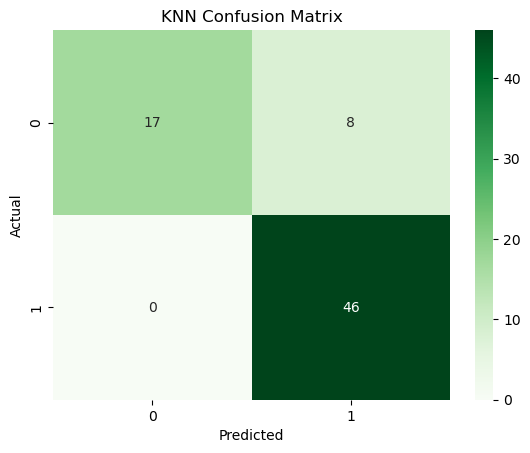

In [59]:
sns.heatmap(confusion_matrix(y_test, y_pred_knn),
            annot=True, fmt='d', cmap='Greens')
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The K Nearest Neighbors model correctly identified 46 diabetic patients, missed no diabetics, incorrectly flagged 8 healthy patients as diabetic, and correctly identified 17 healthy patients

In [60]:
print("KNN Report:\n",classification_report(y_test, y_pred_knn))

KNN Report:
               precision    recall  f1-score   support

           0       1.00      0.68      0.81        25
           1       0.85      1.00      0.92        46

    accuracy                           0.89        71
   macro avg       0.93      0.84      0.86        71
weighted avg       0.90      0.89      0.88        71



In [61]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8732394366197183


In [62]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

In [63]:
TN_dt, FP_dt, FN_dt, TP_dt = cm_dt.ravel()

print("Decision Tree:")
print("TP:", TP_dt)
print("TN:", TN_dt)
print("FP:", FP_dt)
print("FN:", FN_dt)

Decision Tree:
TP: 42
TN: 20
FP: 5
FN: 4


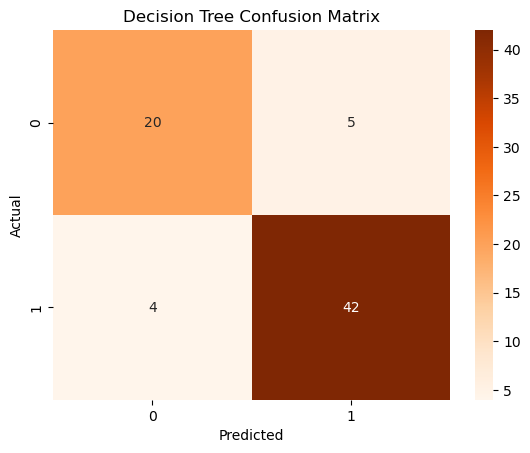

In [64]:
sns.heatmap(cm_dt, annot=True, fmt='d', cmap = 'Oranges')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The Decision Tree model correctly identified 42 diabetic patients, missed 4 diabetics, incorrectly flagged 5 healthy patients as diabetic, and correctly identified 20 healthy patients

In [65]:
print("Decision Tree Report:\n",classification_report(y_test, y_pred_dt))

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82        25
           1       0.89      0.91      0.90        46

    accuracy                           0.87        71
   macro avg       0.86      0.86      0.86        71
weighted avg       0.87      0.87      0.87        71



In [66]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.9577464788732394


In [67]:
cm_rf = confusion_matrix(y_test, y_pred_rf)

TN_rf, FP_rf, FN_rf, TP_rf = cm_rf.ravel()

In [68]:
print("Random Forest:")
print("TP:", TP_rf)
print("TN:", TN_rf)
print("FP:", FP_rf)
print("FN:", FN_rf)

Random Forest:
TP: 44
TN: 24
FP: 1
FN: 2


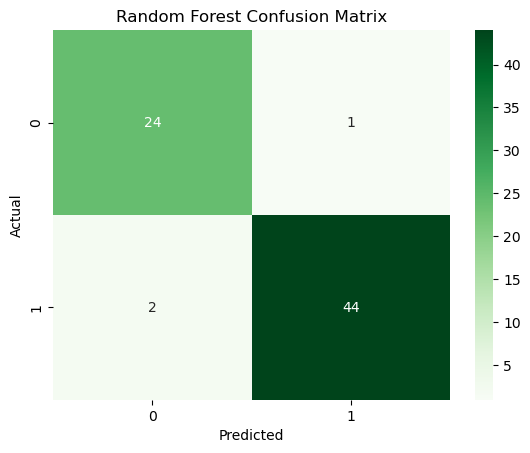

In [69]:
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The Random Forest model correctly identified 44 diabetic patients, missed 2 diabetics, incorrectly flagged 1 healthy patient as diabetic, and correctly identified 24 healthy patients

In [70]:
print("Random Forest Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        25
           1       0.98      0.96      0.97        46

    accuracy                           0.96        71
   macro avg       0.95      0.96      0.95        71
weighted avg       0.96      0.96      0.96        71



In [71]:
print("SVM (Linear) Accuracy:", accuracy_score(y_test, y_pred_svm_linear))

SVM (Linear) Accuracy: 0.8873239436619719


In [72]:
cm_svm_linear = confusion_matrix(y_test, y_pred_svm_linear)
tn, fp, fn, tp = cm_svm_linear.ravel()
print("SVM (Linear):")
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

SVM (Linear):
TP: 43
TN: 20
FP: 5
FN: 3


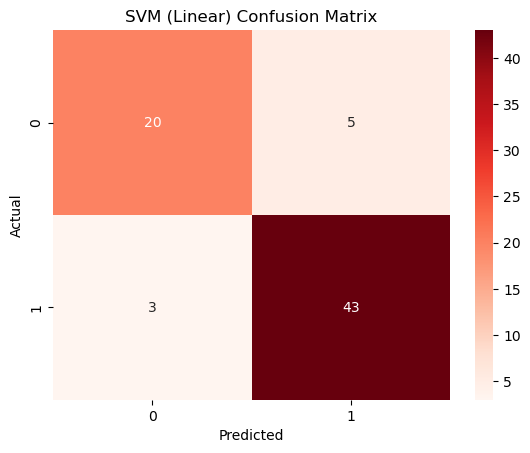

In [73]:
sns.heatmap(cm_svm_linear, annot=True, fmt='d', cmap='Reds')
plt.title("SVM (Linear) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The SVM (Linear) model correctly identified 43 diabetic patients, missed 3 diabetics, incorrectly flagged 5 healthy patients as diabetic, and correctly identified 20 healthy patients

In [74]:
print("SVM Linear Report:\n",classification_report(y_test, y_pred_svm_linear))

SVM Linear Report:
               precision    recall  f1-score   support

           0       0.87      0.80      0.83        25
           1       0.90      0.93      0.91        46

    accuracy                           0.89        71
   macro avg       0.88      0.87      0.87        71
weighted avg       0.89      0.89      0.89        71



In [75]:
print("SVM (RBF) Accuracy:", accuracy_score(y_test, y_pred_svm_rbf))

SVM (RBF) Accuracy: 0.9577464788732394


In [76]:
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf)
tn, fp, fn, tp = cm_svm_rbf.ravel()
print("SVM (RBF):")
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)

SVM (RBF):
TP: 45
TN: 23
FP: 2
FN: 1


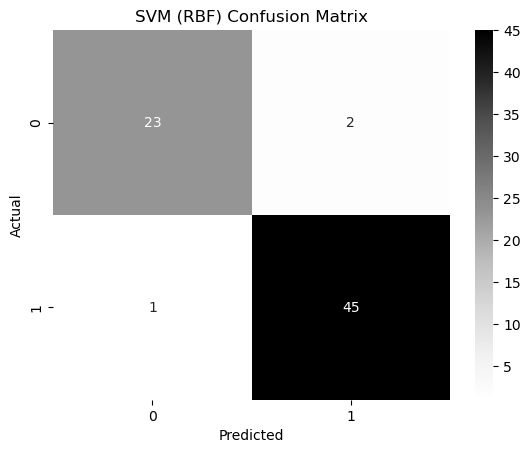

In [77]:
sns.heatmap(cm_svm_rbf, annot=True, fmt='d', cmap='Grays')
plt.title("SVM (RBF) Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The SVM (RBF) model correctly identified 45 diabetic patients, missed 1 diabetic, incorrectly flagged 2 healthy patients as diabetic, and correctly identified 23 healthy patients

In [78]:
print("SVM RBF Report:\n",classification_report(y_test, y_pred_svm_rbf))

SVM RBF Report:
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.96      0.98      0.97        46

    accuracy                           0.96        71
   macro avg       0.96      0.95      0.95        71
weighted avg       0.96      0.96      0.96        71



In [79]:
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8169014084507042


In [80]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
tnx, fpx, fnx, tpx = cm_xgb.ravel()
print("XGBoost:")
print("TP:", tpx)
print("TN:", tnx)
print("FP:", fpx)
print("FN:", fnx)

XGBoost:
TP: 46
TN: 12
FP: 13
FN: 0


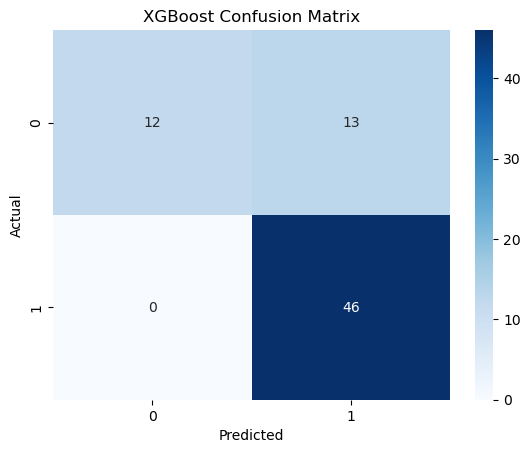

In [81]:
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

The XGBoost model correctly identified 46 diabetic patients, missed no diabetics, incorrectly flagged 13 healthy patients as diabetic, and correctly identified 12 healthy patients

In [82]:
print("XGBoost Report:\n",classification_report(y_test, y_pred_xgb))

XGBoost Report:
               precision    recall  f1-score   support

           0       1.00      0.48      0.65        25
           1       0.78      1.00      0.88        46

    accuracy                           0.82        71
   macro avg       0.89      0.74      0.76        71
weighted avg       0.86      0.82      0.80        71



In [83]:
results = {}

models = {
    "Logistic Regression": y_pred,
    "KNN": y_pred_knn,
    "Decision Tree": y_pred_dt,
    "Random Forest": y_pred_rf,
    "SVM (Linear)": y_pred_svm_linear,
    "SVM (RBF)": y_pred_svm_rbf,
    "XGBoost": y_pred_xgb
}

for name, preds in models.items():
    acc = accuracy_score(y_test, preds)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

    results[name] = {
        "Accuracy": acc,
        "TP": tp,
        "TN": tn,
        "FP": fp,
        "FN": fn
    }

In [84]:
results_df = pd.DataFrame(results).T

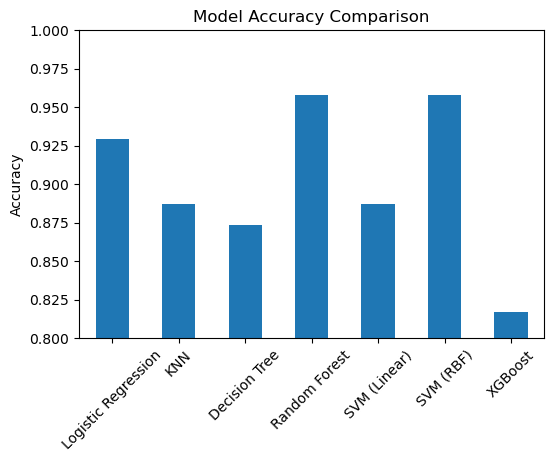

In [85]:
plt.figure(figsize=(6,4))
results_df["Accuracy"].plot(kind="bar", ylim=(0.8,1), title="Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

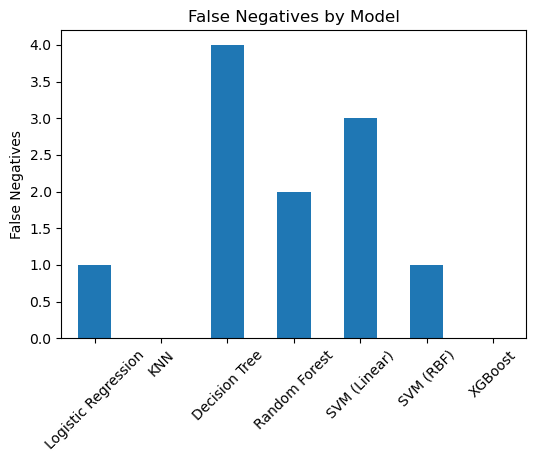

In [86]:
plt.figure(figsize=(6,4))
results_df["FN"].plot(kind="bar", title="False Negatives by Model")
plt.ylabel("False Negatives")
plt.xticks(rotation=45)
plt.show()

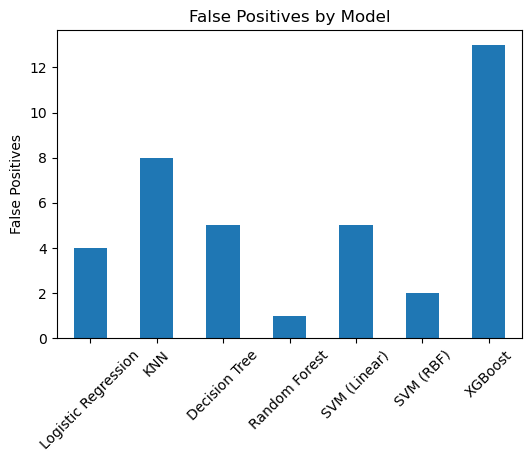

In [87]:
plt.figure(figsize=(6,4))
results_df["FP"].plot(kind="bar", title="False Positives by Model")
plt.ylabel("False Positives")
plt.xticks(rotation=45)
plt.show()

In [88]:
results_df = pd.DataFrame(results).T
results_df

,Accuracy,TP,TN,FP,FN
Logistic Regression,0.929577,45.0,21.0,4.0,1.0
KNN,0.887324,46.0,17.0,8.0,0.0
Decision Tree,0.873239,42.0,20.0,5.0,4.0
Random Forest,0.957746,44.0,24.0,1.0,2.0
SVM (Linear),0.887324,43.0,20.0,5.0,3.0
SVM (RBF),0.957746,45.0,23.0,2.0,1.0
XGBoost,0.816901,46.0,12.0,13.0,0.0


# Selecting the Best Model

Model selection depends on clinical priorities (business)

## Goal 1: Never miss a diabetic patient (FN is the worst possible error)

### Best Models:
- KNN (FN = 0)
- XGBoost (FN = O)
- Logistic Regression (FN = 1)
- SVM RBF (FN = 1)

## Goal 2: Overall best balanced medical model (Few FN, few FP, strong accuracy)

### Best Models:

- SVM RBF (Accuracy = 95.7%, FN = 1, FP = 2)
- Random Forest (Accuracy = 95.7%, FN = 2, FP = 1)
- Logistic Regression (Accuracy = 93%, FN = 1, FP = 4)

## Goal 3: Avoid unnecessary panic (FP worst possible)

### Best Models:
- Random Forest (FP = 1)
- SVM RBF (FP = 2)
- Logistic Regression (FP = 4)

# Conclusion

- Best screening tool is **XGBoost or KNN**
- Balanced diagnostic aid is **SVM (RBF)**
- Production default should be **Random Forest or SVM (RBF)**
- Explainable baseline perfected by **Logistic Regression**